## Access Satellite AusTemp SST 8Day (Zarr)
This Jupyter notebook demonstrates how to access and plot satellite_austemp_sst_8day data, available as a [Zarr](https://zarr.dev/) dataset stored on S3.

🔗 More information about the dataset is available [in the AODN metadata catalogue](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/62f6b449-90dc-45bf-8acb-ae52e8a58c5c).

📌 The source of truth for this notebook is maintained on [GitHub](https://github.com/aodn/aodn_cloud_optimised/tree/main/notebooks/satellite_austemp_sst_8day.ipynb).


In [1]:
dataset_name = "satellite_austemp_sst_8day"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.11 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python3
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Using Python 3.12.11 environment at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised
Resolved 241 packages in 113ms
Audited 241 packages in 4ms
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


✅ Local version 0.3.2 is up to date (remote: 0.3.2)


In [3]:
from DataQuery import GetAodn

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:3445: UserWarning: registration of accessor <class 'DataQuery.AODNAccessor'> under name 'aodn' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  @pd.api.extensions.register_dataframe_accessor("aodn")


# Understanding the Dataset

In [4]:
# remote zarr dataset
aodn = GetAodn(bucket_name="imos-data-lab-optimised")
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 1.4 s, sys: 113 ms, total: 1.52 s
Wall time: 2.83 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	time = 2494 ;
	lat = 1890 ;
	lon = 2685 ;

variables:
	object filename(time) ;
	float32 lat(lat) ;
		lat:axis = Y ;
		lat:long_name = latitude ;
		lat:reference_datum = WGS84 geographic coordinate system ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:valid_max = 90.0 ;
		lat:valid_min = -90.0 ;
	float32 lon(lon) ;
		lon:axis = X ;
		lon:long_name = longitude ;
		lon:reference_datum = WGS84 geographic coordinate system ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
		lon:valid_max = 180.0 ;
		lon:valid_min = -180.0 ;
	float64 sst(time, lat, lon) ;
		sst:_ChunkSizes = [1, 500, 500] ;
		sst:comment = The skin temperature of the ocean at a depth of approximately 10 microns ;
		sst:long_name = sea surface skin temperature ;
		sst:units = degrees_Celsius ;
		sst:valid_max = 100.0 ;
		sst:valid_min = -100.0 ;
	float64 sst_anom(time, lat, lon) ;
		sst_anom:_ChunkSizes = [1, 500, 500] ;
		sst_anom:comment = The anomaly skin

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2012-01-01 15:20:00'), Timestamp('2018-10-29 15:20:00'))

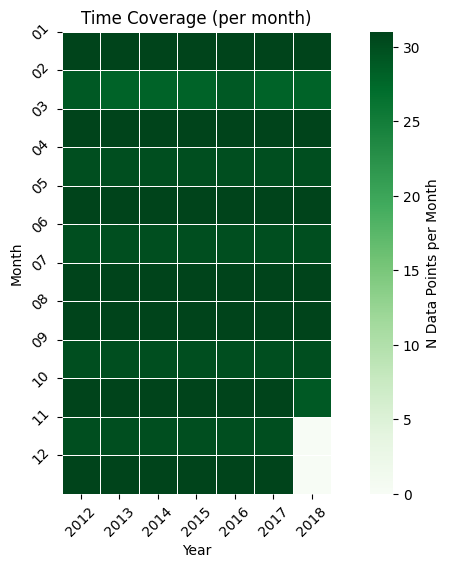

In [7]:
aodn_dataset.plot_time_coverage()

## Timeseries at a point

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:1469: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[self.var_name].resample(resample)


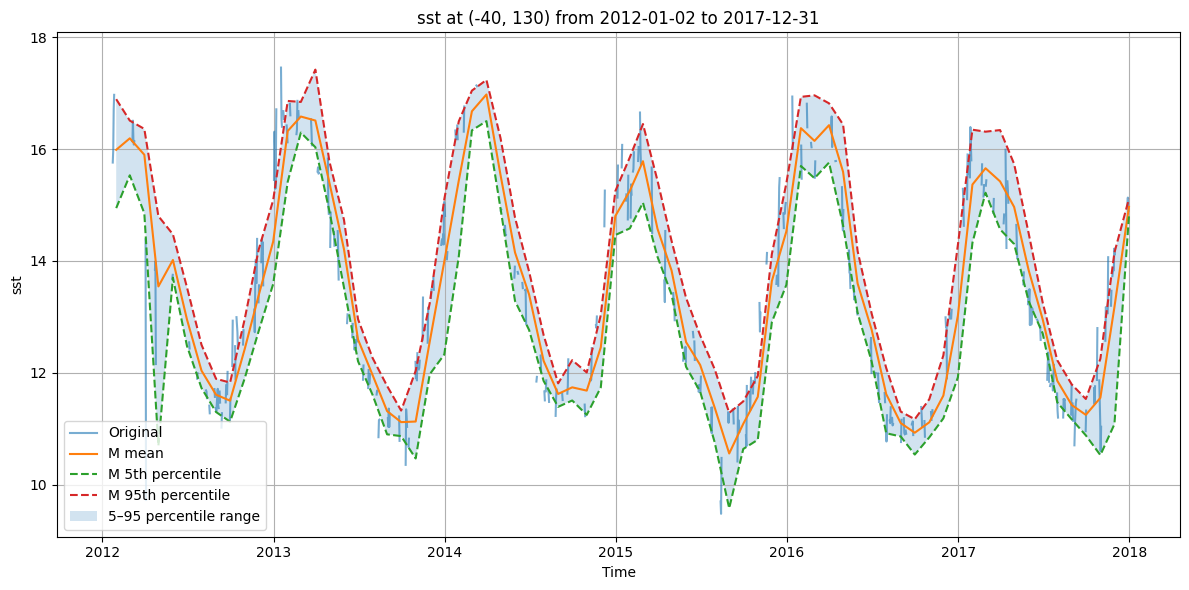

CPU times: user 4.91 s, sys: 706 ms, total: 5.61 s
Wall time: 9.01 s


In [8]:
%%time
time_series_df = aodn_dataset.get_timeseries_data(var_name='sst', 
                                                  lat=-40, 
                                                  lon=130, 
                                                  date_start='2012-01-02', 
                                                  date_end='2017-12-31', 
                                                  lon_name_override="lon", 
                                                  lat_name_override="lat").plot_timeseries()

## Plot a gridded variable

2026-02-12 10:26:12,809 - aodn.GetAodn - INFO - Plotting 'sea surface skin temperature' for 6 time steps.
/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:2869: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(


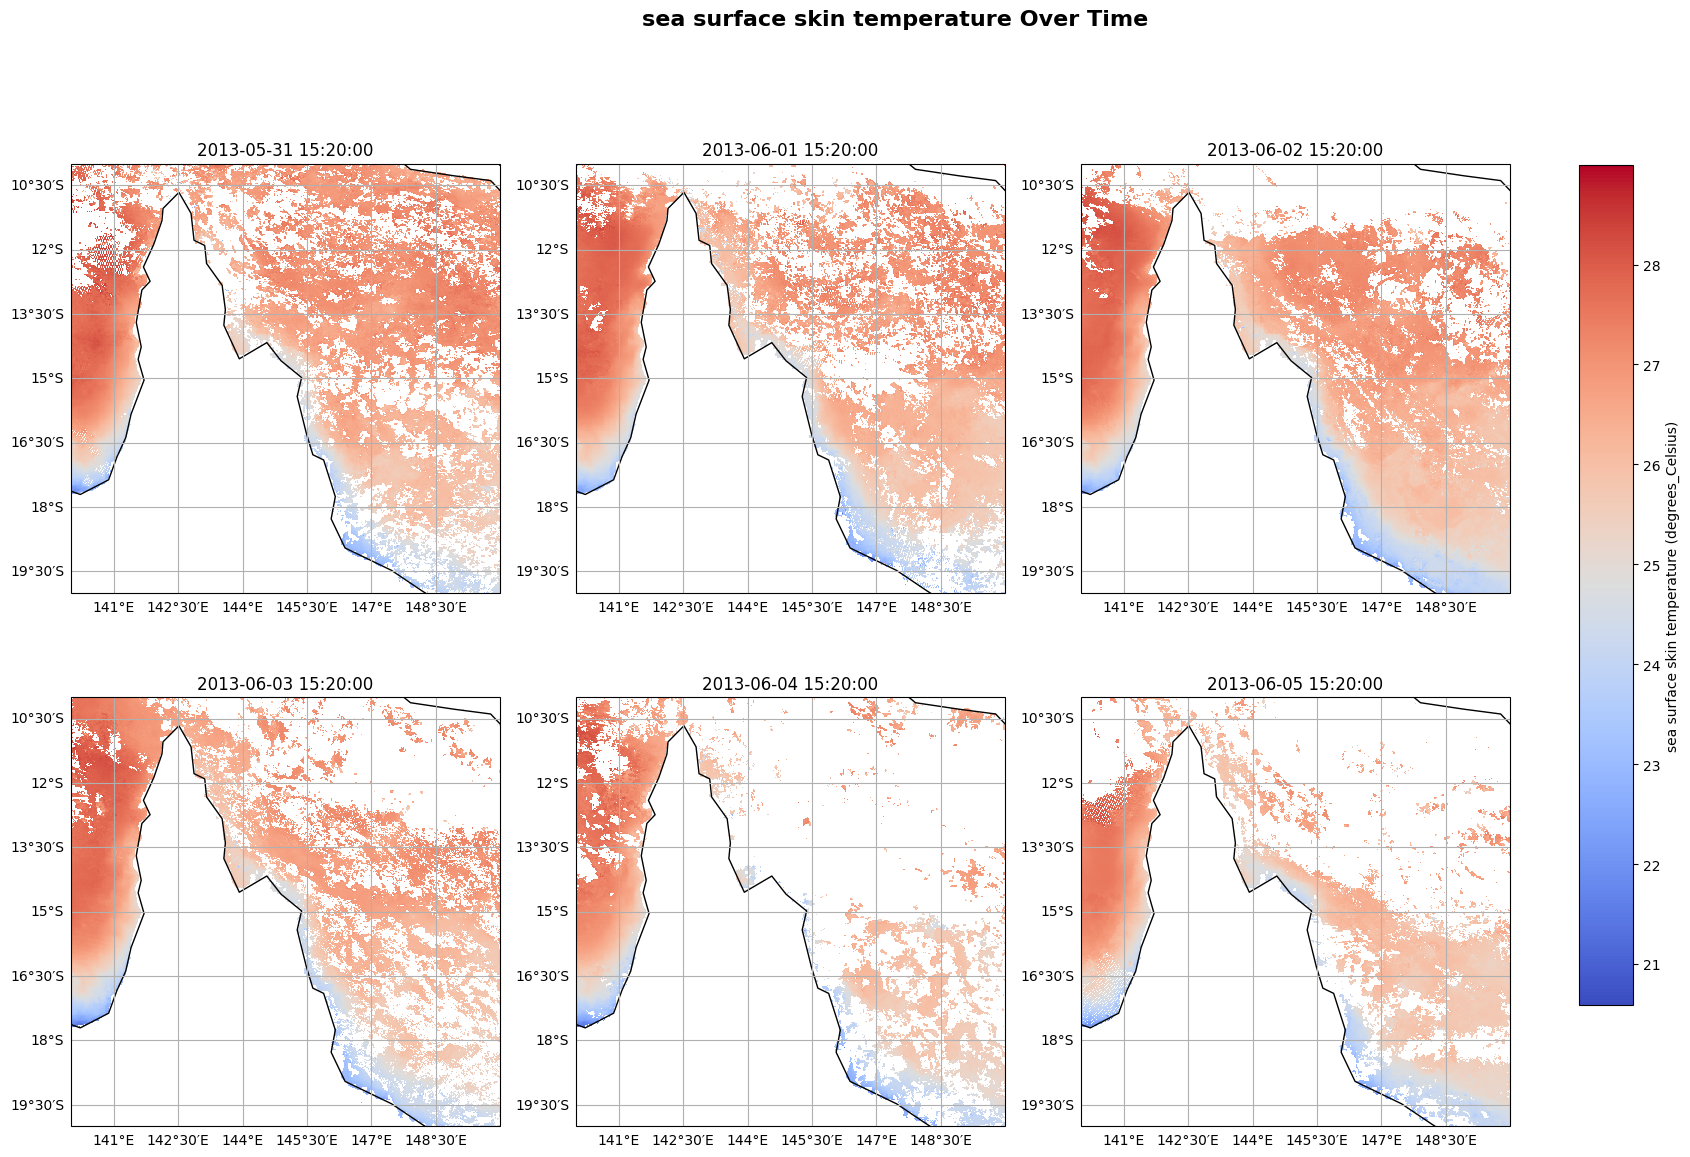

CPU times: user 4.64 s, sys: 2.56 s, total: 7.21 s
Wall time: 5.74 s


In [9]:
%%time
time_series_df = aodn_dataset.plot_gridded_variable(var_name='sst', 
                                                    date_start='2013-06-01',                                                
                                                    lon_name_override="lon", 
                                                    lat_name_override="lat", 
                                                    lon_slice=(140, 150), 
                                                    lat_slice=(-20, -10), 
                                                    n_days=6, 
                                                    coastline_resolution="110m", 
                                                    log_scale=False)